# About Series

- Series 란?
  Data의 컬럼이 1개인 자료구조이며, 인덱스와 1개의 열로 구성되어 있음

## Series 만드는 방법

In [1]:
import pandas as pd

In [5]:
# Data Type이 '리스트'인 경우

ls1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
ls2 = [1, 2, 3, 'Apple', 'play', 6, 7, 8, 9]

sr1 = pd.Series(ls1)
sr1

sr2 = pd.Series(ls2)
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
dtype: object

In [6]:
# Series에 Name 설정

sr1.name = "Number"
sr2.name = "Word"
sr2

0        1
1        2
2        3
3    Apple
4     play
5        6
6        7
7        8
8        9
Name: Word, dtype: object

In [9]:
# Data Type이 '딕셔너리'인 경우
dic1 = {'a':1, 'b':2, 'c':3, 'd':4}

sr3 = pd.Series(dic1)
sr3
sr3.name = "Number"
sr3

a    1
b    2
c    3
d    4
Name: Number, dtype: int64

## 삼성전자 종가 Series로 불러오기

In [22]:
import pandas as pd

# squeeze 옵션은 Pandas 1.2.0 이후 제거되었으므로, squeeze=True 없이 실행
# 이전 squeeze=True의 기능을 대체하려면 squeeze() 메서드를 따로 적용
a = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
a

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

## Series Index & Value

In [25]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [26]:
samsung_price.index

Index(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-08',
       '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15',
       ...
       '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17'],
      dtype='object', name='Date', length=977)

In [29]:
if '2020-12-15' in samsung_price.index:
    print(samsung_price.loc['2020-12-15'])

# loc 특정한 인덱스의 값이 있는지 확인

73800


In [31]:
samsung_price.iloc[100]

# iloc 인덱스(번호) 값 가져오기

49500

## Series에 새로운 행을 추가

In [32]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [37]:
# 총 길이는?
#samsung_price.index[samsung_price.shape[0]-1]
samsung_price.shape

(977,)

In [41]:
samsung_price.loc['2021-12-20'] = 77100
samsung_price

samsung_price.loc['2021-12-16'] = 100
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-14    77000
2021-12-15    77600
2021-12-16      100
2021-12-17    78000
2021-12-20    77100
Name: Close, Length: 978, dtype: int64

## 두개의 Series 연결

In [10]:
import pandas as pd

series1_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet1', index_col = 0).squeeze("columns")
series1_samsung

series2_samsung = pd.read_excel('samsung_excel.xlsx', sheet_name = 'Sheet2', index_col = 0).squeeze("columns")
series2_samsung


# Pandas 1.3.0 이후 버전에서 Series.append()가 제거되었음
# pd.concat() 사용

series_samsung = pd.concat([series1_samsung, series2_samsung], ignore_index=False)
series_samsung

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-20    77100
2021-12-21    78100
2021-12-22    79400
2021-12-23    79900
2021-12-24    80500
Name: Close, Length: 982, dtype: int64

## Series 기본 통계치 구하기

In [1]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [3]:
# 삼성전자 고점, 저점

samsung_price.max()
samsung_price.min()
samsung_price.describe()

count      977.000000
mean     57295.854657
std      14084.402274
min      37450.000000
25%      46300.000000
50%      51300.000000
75%      70200.000000
max      91000.000000
Name: Close, dtype: float64

In [6]:
samsung_price.index[samsung_price.values == samsung_price.max()]
samsung_price.index[samsung_price.values == samsung_price.min()]

Index(['2019-01-04'], dtype='object', name='Date')

In [9]:
samsung_price.iloc[samsung_price.argmin()]
samsung_price.index[samsung_price.argmin()]
samsung_price.iloc[samsung_price.argmax()]
samsung_price.index[samsung_price.argmax()]

'2021-01-11'

## Series 연산
- 삼성전자 수익률 구하기

In [1]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [2]:
samsung_price.shift(1)

Date
2018-01-02        NaN
2018-01-03    51020.0
2018-01-04    51620.0
2018-01-05    51080.0
2018-01-08    52120.0
               ...   
2021-12-13    76900.0
2021-12-14    76800.0
2021-12-15    77000.0
2021-12-16    77600.0
2021-12-17    77800.0
Name: Close, Length: 977, dtype: float64

In [3]:
samsung_price - samsung_price.shift(1)

Date
2018-01-02       NaN
2018-01-03     600.0
2018-01-04    -540.0
2018-01-05    1040.0
2018-01-08    -100.0
               ...  
2021-12-13    -100.0
2021-12-14     200.0
2021-12-15     600.0
2021-12-16     200.0
2021-12-17     200.0
Name: Close, Length: 977, dtype: float64

In [4]:
samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [5]:
samsung_price.pct_change()

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [6]:
samsung_return.max()

0.10470588235294118

In [7]:
samsung_return.index[samsung_return.argmax()]

'2020-03-24'

## Nan 값

In [1]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [11]:
samsung_return.fillna(0)

Date
2018-01-02    0.000000
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [10]:
samsung_return.dropna()

Date
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
2018-01-09   -0.031142
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 976, dtype: float64

## 순서대로 정렬

In [12]:
import pandas as pd

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return

Date
2018-01-02         NaN
2018-01-03    0.011760
2018-01-04   -0.010461
2018-01-05    0.020360
2018-01-08   -0.001919
                ...   
2021-12-13   -0.001300
2021-12-14    0.002604
2021-12-15    0.007792
2021-12-16    0.002577
2021-12-17    0.002571
Name: Close, Length: 977, dtype: float64

In [13]:
# index 순서대로 정렬
samsung_price.sort_index(ascending = True)

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

In [14]:
# value순서대로 정렬 
samsung_price.sort_values(ascending = True).head(30)

Date
2019-01-04    37450
2019-01-03    37600
2019-01-08    38100
2018-12-27    38250
2018-12-26    38350
2018-12-21    38650
2018-12-20    38650
2018-12-28    38700
2019-01-07    38750
2019-01-02    38750
2018-12-24    38800
2018-12-18    38900
2018-12-14    38950
2018-12-19    39100
2018-12-17    39150
2019-01-09    39600
2019-01-10    39800
2018-12-13    40000
2019-01-14    40050
2018-12-10    40200
2018-12-11    40250
2018-12-12    40450
2018-12-06    40500
2019-01-11    40500
2018-12-07    40950
2018-10-25    41000
2018-10-26    41000
2019-01-15    41100
2019-05-17    41200
2018-10-29    41400
Name: Close, dtype: int64

 ## Series 조건 설정

In [6]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return = samsung_return * 100
samsung_return

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [9]:
samsung_return[samsung_return.values >= 4]
sum(samsung_return.values >= 4)
print(17/944*100)

1.8008474576271187


In [21]:
np.where(samsung_return.values >= 4, 1, 0)

samsung_return_4 = pd.Series(np.where(samsung_return.values >= 4, "Over 4%", "Under"))
samsung_return_4.index = samsung_return.index
samsung_return_4.loc['2020-06-16']

'Over 4%'

## Series rolling

In [3]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return = samsung_return * 100
samsung_price

Date
2018-01-02    51020
2018-01-03    51620
2018-01-04    51080
2018-01-05    52120
2018-01-08    52020
              ...  
2021-12-13    76800
2021-12-14    77000
2021-12-15    77600
2021-12-16    77800
2021-12-17    78000
Name: Close, Length: 977, dtype: int64

<Axes: xlabel='Date'>

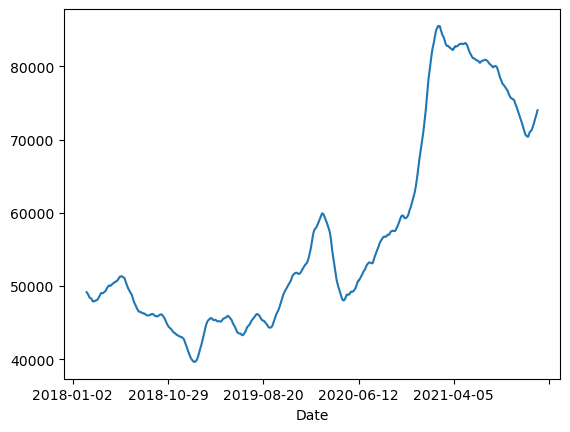

In [6]:
samsung_price.rolling(window=30).mean().plot()

## Series 값의 구간을 나눠보자

In [7]:
import pandas as pd
import numpy as np

samsung_price = pd.read_csv('삼성전자 종가.csv', index_col=0, header = 0).squeeze("columns")
samsung_price

samsung_return = (samsung_price - samsung_price.shift(1))/samsung_price.shift(1)
samsung_return = samsung_return * 100
samsung_return

Date
2018-01-02         NaN
2018-01-03    1.176009
2018-01-04   -1.046106
2018-01-05    2.036022
2018-01-08   -0.191865
                ...   
2021-12-13   -0.130039
2021-12-14    0.260417
2021-12-15    0.779221
2021-12-16    0.257732
2021-12-17    0.257069
Name: Close, Length: 977, dtype: float64

In [9]:
# pd.cut()
pd.cut(samsung_return, bins=10)
pd.cut(samsung_return, bins=10).value_counts()

Close
(-1.33, 0.356]      414
(0.356, 2.041]      298
(-3.016, -1.33]     137
(2.041, 3.727]       70
(-4.702, -3.016]     31
(3.727, 5.413]       19
(-6.405, -4.702]      3
(5.413, 7.099]        2
(7.099, 8.785]        1
(8.785, 10.471]       1
Name: count, dtype: int64

In [11]:
# pd qcut()
pd.qcut(samsung_return, 10)
pd.qcut(samsung_return, 10).value_counts()

Close
(-0.332, 0.0]       108
(-6.389, -1.938]     98
(-1.938, -1.161]     98
(-0.702, -0.332]     98
(0.753, 1.22]        98
(2.003, 10.471]      98
(-1.161, -0.702]     97
(0.358, 0.753]       97
(1.22, 2.003]        97
(0.0, 0.358]         87
Name: count, dtype: int64